In [1]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./files/*智冠.txt")
    return files
textfile=textfile()
textfile

['./files\\20180518智冠.txt',
 './files\\20180519智冠.txt',
 './files\\20180521智冠.txt',
 './files\\20180604智冠.txt',
 './files\\20180606智冠.txt',
 './files\\20180611智冠.txt',
 './files\\20180613智冠.txt',
 './files\\20180614智冠.txt',
 './files\\20180617智冠.txt',
 './files\\20180621智冠.txt']

### 自定義jieba字典，存檔到dict.txt

In [3]:
dictlist = ['股東臨時會','智冠','大同股份有限公司','公允價值','財務報表','林蔚山','信用評等']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 2.617 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [4]:
stop = open('stopwords.txt','r',encoding='UTF-8-sig')
stopwords = stop.readlines()
stop.close()
stopwords = [x.strip() for x in stopwords]
stopwords

['我',
 '對',
 '年',
 '月',
 '的',
 '1',
 '2',
 '(',
 ')',
 '/',
 '於',
 '大同',
 '公司',
 '4',
 '106',
 '臺',
 '本',
 '人',
 '為',
 '之',
 '北',
 '5',
 '有',
 '元',
 '一事',
 'TCRI',
 'ai',
 '台灣',
 '之爭',
 '表示',
 '億元',
 '今年',
 '指出',
 '特殊',
 '記者',
 '台紙',
 '智冠',
 '榮剛',
 '台苯',
 '遊戲',
 '目前',
 '去年']

In [5]:

puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [6]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus=[]
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    
    for i in range(40):
        #好像多刪幾次就會成功了= =
        #我重複刪5次
        #如果再出現可以再增加次數
        for w in r_list:
            if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                r_list.remove(w)
    st=" ".join(r_list)
    corpus.append(st)
corpus

['引爆 經營權 網銀國際 有意 取得 三 董一監 財訊 快報 來源 財訊 快報 相關 個 股 橘子 預計 日召開 股東會 除將 討論 配發 元現 金 股利 案外 最 重要 是 將進行 董監 改選 根據 市場 派 收 購委 託 書來 看 網銀國際 有意 取得 席 董事 及 一席 監察人 使得 此次 股東會 增添 不少 話題 股價 也 正 醞釀 董監 改選 行情 根據 市場 派 委 託 書 提名 資料 顯示 網銀國際 董事 長 蕭政豪 興天 科技 代表 吳艾耘 席 董事 及 莊璧華 席獨立 董事 監察人 選舉 人則 是 網銀國際 代表人 林青翰 目標 董 監 蕭政豪 興天 科技 投資 專戶 持股 約 萬 張 股權 占 比 而 蕭政豪 持有 橘子 持股 也 是 以興天 科技 檯 面上 持股 持有 兩大遊戲 廠商 比重 相當 接近 以 檯 面上 董監 持股 來 看 董事 長 王俊博 持股 約 整體 董監事 持股 約 據 了解 檯 面下 王俊博 相關 可掌 控股 權有 高達 如果 市場 派 有意 取得 股權 及 董監 席次 不 排除 將在 市場 上 買 進 增加 持股 網銀國際 成立 以多樣 化 產品 拓展 更 寬廣 潛力 客群 營收 創 新高 除線 上 服務 網銀國際 也 投入 實體 遊戲點 卡通 路 市場 發行 遊戲點 卡 遊 卡 以及 知名 電競團隊 閃電狼 營收 站上 億元大關 成長 幅度 高達 二位 數 而 月初 日本 廠商 對外 宣布 與 台灣遊 戲廠 商網 銀國際 成立 合資 合作 擴大 彼此 專業 及 服務 領域 網銀國際 擁有 星城 劍俠 情緣 等 營運 經驗 而 則是 日本 同樣 擁有 豐富 開發 與 營運 經驗 例如 手機 星娘 電腦 等 作品 擁有 雄厚 營運 實力 雙方 也 寫 下 中日 國際 合作 新 模式 遊戲界 素有 橘子 中網 銀 南 幾乎 一統 國內 江山 網銀 除了 已 持股 橘子 外 也 希望 能 取得 股權 讓 版圖 更加 完整性',
 '經營 權大戰 開打 經濟 日報 葉子菁 台北 報導 董事 長 王俊博 報系 資料 照 老牌 大廠 日 將改選 董監事 市場 派 網銀國際 有意 介入 目標 取得 三席 董事 一席 監察人 恐面 臨 成立 以來 首次 經營 權大戰 近期 市場 派 已 向 券商 公開 徵求委 託 書 派 也 不甘示弱

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [7]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  990


In [8]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (10, 990)


<10x990 sparse matrix of type '<class 'numpy.float64'>'
	with 1569 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [9]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)   

----Document 0----
一統 0.06910131992025381 0 14
不少 0.06910131992025381 0 41
中日 0.06910131992025381 0 58
中網 0.05874243502731911 0 59
二位 0.06910131992025381 0 72
人則 0.06910131992025381 0 83
以及 0.051392689229971936 0 100
以多樣 0.06910131992025381 0 102
以興天 0.06910131992025381 0 106
作品 0.06910131992025381 0 118
使得 0.06910131992025381 0 119
來源 0.06910131992025381 0 121
例如 0.05874243502731911 0 122
億元大關 0.06910131992025381 0 141
元現 0.06910131992025381 0 144
兩大遊戲 0.06910131992025381 0 158
則是 0.06910131992025381 0 184
劍俠 0.06910131992025381 0 192
卡通 0.06910131992025381 0 211
取得 0.11193261119401503 0 219
可掌 0.06910131992025381 0 227
台灣遊 0.06910131992025381 0 234
合作 0.08206760867407449 0 241
合資 0.06910131992025381 0 243
同樣 0.06910131992025381 0 247
商網 0.06910131992025381 0 261
國際 0.05874243502731911 0 282
增添 0.06910131992025381 0 295
如果 0.051392689229971936 0 326
完整性 0.06910131992025381 0 332
客群 0.06910131992025381 0 335
宣布 0.06910131992025381 0 336
實力 0.06910131992025381 0 338
實體 0.069101319920253

停手 0.05769991893885213 3 128
傳聞 0.05769991893885213 3 133
先前 0.0858262622491483 3 147
兩席 0.17309975681655637 3 159
兩方 0.05769991893885213 3 160
兩方價 0.05769991893885213 3 161
出雙 0.05769991893885213 3 175
另外 0.05769991893885213 3 222
呈現 0.05769991893885213 3 254
商約 0.05769991893885213 3 260
商議 0.05769991893885213 3 262
回應 0.05769991893885213 3 270
因外 0.05769991893885213 3 271
因市場 0.05769991893885213 3 273
因而 0.05769991893885213 3 276
外資 0.0858262622491483 3 300
多元性 0.05769991893885213 3 303
大戰 0.05769991893885213 3 312
妥當 0.05769991893885213 3 327
專案 0.05769991893885213 3 351
專業性 0.05769991893885213 3 353
巨頭 0.05769991893885213 3 366
已演 0.05769991893885213 3 368
市場 0.21332825450336187 3 370
席次 0.08437902993088853 3 374
影響 0.05769991893885213 3 395
情事 0.05769991893885213 3 405
想到 0.05769991893885213 3 407
意味 0.05769991893885213 3 410
戲龍頭 0.09810040512275792 3 441
投資人 0.14715060768413687 3 453
持股 0.18692848703793608 3 464
指示 0.05769991893885213 3 465
提名 0.08437902993088853 3 479
援助 0.05769

戲廠 0.0554474209323806 5 437
拒絕 0.07455321038866566 5 456
拿下 0.0554474209323806 5 461
持股 0.12076376430045858 5 464
掌握 0.06337704001006525 5 468
採訪 0.14910642077733133 5 470
推派 0.07455321038866566 5 475
搶攻 0.07455321038866566 5 486
撕破 0.1267540800201305 5 487
支持 0.0554474209323806 5 495
改版 0.07455321038866566 5 498
文康 0.07455321038866566 5 507
新作 0.07455321038866566 5 509
日舉行 0.07455321038866566 5 527
早已 0.0554474209323806 5 528
旺季 0.06337704001006525 5 529
時間 0.07455321038866566 5 537
暑假 0.07455321038866566 5 539
書大戰 0.06337704001006525 5 547
本周 0.07455321038866566 5 565
格外 0.07455321038866566 5 575
條件 0.06337704001006525 5 577
機會 0.0554474209323806 5 582
權爭 0.07455321038866566 5 586
比例 0.06337704001006525 5 593
氣炸 0.07455321038866566 5 597
法人 0.07455321038866566 5 602
注目 0.07455321038866566 5 604
派將 0.0554474209323806 5 609
激烈 0.14910642077733133 5 624
焦點 0.07455321038866566 5 631
爭奪 0.14910642077733133 5 643
王俊博個 0.06337704001006525 5 656
王俊博正 0.07455321038866566 5 661
現任 0.0554474209

碰過 0.050499029710542084 8 705
確實 0.08836136735298877 8 707
積極 0.050499029710542084 8 710
穩腳步 0.05940423828306913 8 712
組不組 0.05940423828306913 8 727
組合 0.11880847656613826 8 728
組國家隊 0.1782127148492074 8 729
結果 0.11783938123375814 8 731
網銀 0.05274053306288062 8 745
總算能 0.05940423828306913 8 752
繼續 0.08836136735298877 8 755
缺缺 0.11880847656613826 8 756
美術外 0.05940423828306913 8 757
老字號 0.1782127148492074 8 762
考慮 0.050499029710542084 8 765
而是 0.05940423828306913 8 767
而言 0.05940423828306913 8 768
耕耘 0.05940423828306913 8 769
股東會 0.05274053306288062 8 778
自己 0.050499029710542084 8 790
至深 0.05940423828306913 8 796
興趣 0.11880847656613826 8 799
舒適 0.05940423828306913 8 802
茁壯 0.05940423828306913 8 805
著覺 0.050499029710542084 8 810
董事 0.06588884020682316 8 812
表情 0.05940423828306913 8 823
規模 0.05940423828306913 8 827
觀察 0.05940423828306913 8 830
認真 0.050499029710542084 8 841
語帶 0.05940423828306913 8 843
資源 0.1782127148492074 8 862
購藍新 0.05940423828306913 8 868
趕回 0.05940423828306913 8 872
跨出

### 將tfidf矩陣用pandas套件將結果整理為DataFrame格式

In [10]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber=textfile[i]
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,./files\20180518智冠.txt,./files\20180519智冠.txt,./files\20180521智冠.txt,./files\20180604智冠.txt,./files\20180606智冠.txt,./files\20180611智冠.txt,./files\20180613智冠.txt,./files\20180614智冠.txt,./files\20180617智冠.txt,./files\20180621智冠.txt
0,一口,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059404,0.000000
1,一名,0.000000,0.000000,0.000000,0.000000,0.074745,0.000000,0.000000,0.000000,0.000000,0.000000
2,一場,0.000000,0.000000,0.000000,0.000000,0.074745,0.000000,0.000000,0.000000,0.000000,0.000000
3,一大,0.000000,0.000000,0.047074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,一家,0.000000,0.000000,0.047074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,一屆,0.000000,0.000000,0.047074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,一席,0.045692,0.120693,0.031127,0.076306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,一年,0.000000,0.000000,0.047074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,一張,0.000000,0.000000,0.000000,0.057700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,一成,0.000000,0.060843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,./files\20180518智冠.txt,./files\20180519智冠.txt,./files\20180521智冠.txt,./files\20180604智冠.txt,./files\20180606智冠.txt,./files\20180611智冠.txt,./files\20180613智冠.txt,./files\20180614智冠.txt,./files\20180617智冠.txt,./files\20180621智冠.txt
0,一口,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059404,0.000000
1,一名,0.000000,0.000000,0.000000,0.000000,0.074745,0.000000,0.000000,0.000000,0.000000,0.000000
2,一場,0.000000,0.000000,0.000000,0.000000,0.074745,0.000000,0.000000,0.000000,0.000000,0.000000
3,一大,0.000000,0.000000,0.047074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,一家,0.000000,0.000000,0.047074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,一屆,0.000000,0.000000,0.047074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,一席,0.045692,0.120693,0.031127,0.076306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,一年,0.000000,0.000000,0.047074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,一張,0.000000,0.000000,0.000000,0.057700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,一成,0.000000,0.060843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 儲存到excel --> tfidf.xlsx
### 將df_tfidf表格存到sheet -->tfidf_1

In [12]:
writer = pd.ExcelWriter('tfidf.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [13]:
tfarray=tfidf.toarray()
tfarray

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.06084275,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05940424, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [14]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,doc10_tfdif
0,一口,0,0,0,0,0,0,0,0,1,0
1,一名,0,0,0,0,1,0,0,0,0,0
2,一場,0,0,0,0,1,0,0,0,0,0
3,一大,0,0,1,0,0,0,0,0,0,0
4,一家,0,0,1,0,0,0,0,0,0,0
5,一屆,0,0,1,0,0,0,0,0,0,0
6,一席,1,3,1,2,0,0,0,0,0,0
7,一年,0,0,1,0,0,0,0,0,0,0
8,一張,0,0,0,1,0,0,0,0,0,0
9,一成,0,1,0,0,0,0,0,0,0,0


In [15]:
df.head()

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,doc10_tfdif
0,一口,0,0,0,0,0,0,0,0,1,0
1,一名,0,0,0,0,1,0,0,0,0,0
2,一場,0,0,0,0,1,0,0,0,0,0
3,一大,0,0,1,0,0,0,0,0,0,0
4,一家,0,0,1,0,0,0,0,0,0,0


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目 

In [16]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff'):
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,doc10_tfdif
0,一口,0,0,0,0,0,0,0,0,1,0
1,一名,0,0,0,0,1,0,0,0,0,0
2,一場,0,0,0,0,1,0,0,0,0,0
3,一大,0,0,1,0,0,0,0,0,0,0
4,一家,0,0,1,0,0,0,0,0,0,0
5,一屆,0,0,1,0,0,0,0,0,0,0
6,一席,1,3,1,2,0,0,0,0,0,0
7,一年,0,0,1,0,0,0,0,0,0,0
8,一張,0,0,0,1,0,0,0,0,0,0
9,一成,0,1,0,0,0,0,0,0,0,0


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [17]:
writer = pd.ExcelWriter('wordscount.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 全部文字的dict建立文字雲

In [18]:
df['sum']=df.sum(axis=1)
wordDict=dict(zip(df['words'], df['sum']))
wordDict

{'一口': 1,
 '一名': 1,
 '一場': 1,
 '一大': 1,
 '一家': 1,
 '一屆': 1,
 '一席': 7,
 '一年': 1,
 '一張': 1,
 '一成': 1,
 '一戰': 1,
 '一改過': 1,
 '一步': 1,
 '一直': 1,
 '一統': 1,
 '一開口': 1,
 '一開始': 1,
 '一間': 2,
 '一點': 1,
 '七席': 3,
 '三大委': 2,
 '三大遊': 2,
 '三家': 7,
 '三席': 2,
 '三年': 2,
 '三成': 1,
 '上半年': 1,
 '上會': 2,
 '上櫃': 1,
 '上演': 1,
 '下委': 1,
 '下旬': 1,
 '下續': 1,
 '不了了之': 1,
 '不予': 1,
 '不僅': 1,
 '不再': 1,
 '不同': 1,
 '不夠': 2,
 '不容': 1,
 '不小': 2,
 '不少': 1,
 '不是': 3,
 '不會': 8,
 '不法': 1,
 '不甘示弱': 3,
 '不能': 2,
 '不計': 1,
 '不論': 1,
 '不過': 7,
 '不高': 1,
 '並以': 1,
 '並強': 1,
 '並著手': 1,
 '並足額': 1,
 '並進': 1,
 '中勝': 1,
 '中心': 1,
 '中日': 1,
 '中網': 2,
 '中部': 1,
 '中間': 2,
 '中除': 1,
 '主委': 1,
 '主攻': 1,
 '之深': 1,
 '之稱': 1,
 '之間': 2,
 '了解': 6,
 '事件': 1,
 '事前': 2,
 '事業': 1,
 '二位': 1,
 '二席': 4,
 '二成': 1,
 '互信': 1,
 '互補': 1,
 '五五波': 3,
 '五大': 1,
 '五席': 1,
 '交易日': 1,
 '交易量': 1,
 '交集': 1,
 '人則': 1,
 '人士': 8,
 '人爭': 1,
 '人選': 1,
 '人馬': 1,
 '什麼': 2,
 '今日': 1,
 '介入': 1,
 '仍想': 1,
 '代理': 4,
 '代表': 7,
 '代表人': 4,
 '以上': 4,
 '以來': 1,
 '以個': 2,
 '以倍

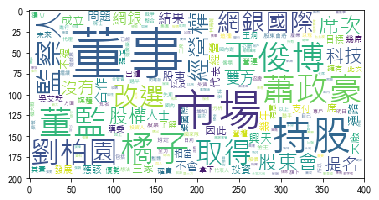

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = r"C:/Users/USER/Desktop/three/msjh.ttc"
wordcloud = WordCloud(font_path = font, background_color="white")
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [20]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten[:30]

[('董事', 96),
 ('市場', 51),
 ('持股', 39),
 ('橘子', 30),
 ('王俊博', 28),
 ('董監', 28),
 ('蕭政豪', 26),
 ('劉柏園', 25),
 ('取得', 24),
 ('監察人', 24),
 ('改選', 20),
 ('網銀國際', 20),
 ('經營權', 18),
 ('席次', 16),
 ('股東會', 16),
 ('股權', 15),
 ('科技', 14),
 ('提名', 12),
 ('沒有', 12),
 ('網銀', 12),
 ('雙方', 11),
 ('合作', 10),
 ('結果', 10),
 ('不會', 8),
 ('人士', 8),
 ('問題', 8),
 ('成立', 8),
 ('經營', 8),
 ('股東', 8),
 ('興天', 8)]

In [21]:
data = []
for t in ten[:15]:
    data.append(t[1])
label = []
for t in ten[:15]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0xfa52cf8>,
 <a list of 15 Text xticklabel objects>)

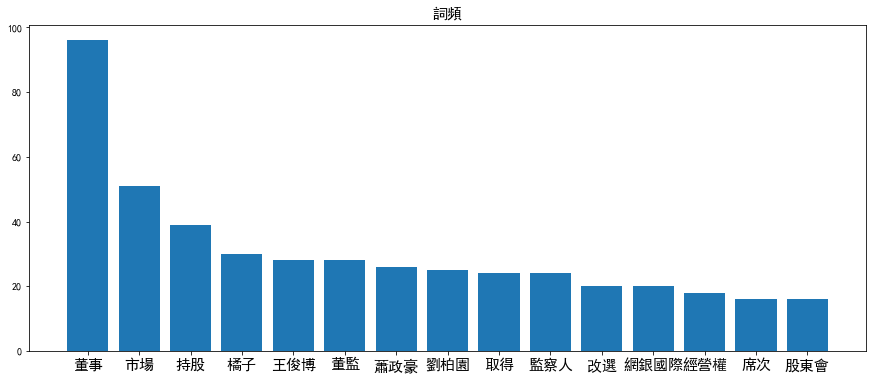

In [22]:
plt.figure(figsize=(15,6))
plt.bar(range(0,15),data)
plt.title("詞頻",fontsize=15)
plt.xticks(range(0,15),label,fontsize=15)

In [23]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[-0.23892822, -0.13558866],
       [-0.26750753, -0.24505898],
       [-0.28439675,  0.01510578],
       [-0.29696315, -0.33361431],
       [-0.21054933,  0.32720108],
       [-0.24369554, -0.34611081],
       [ 0.7979087 , -0.11997361],
       [-0.0423103 ,  0.18606021],
       [-0.01146658,  0.77195291],
       [ 0.7979087 , -0.11997361]])

No handles with labels found to put in legend.


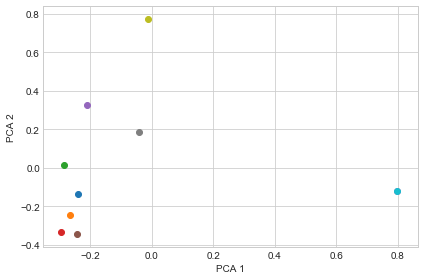

In [24]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)

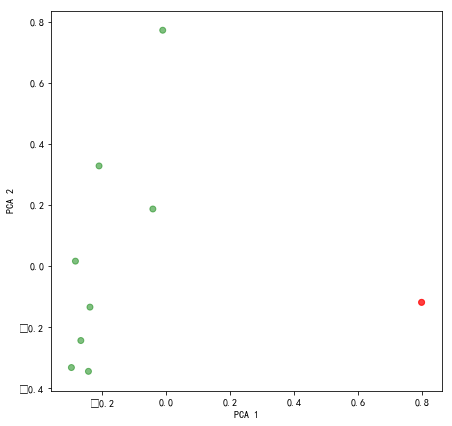

In [27]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c= label_color, alpha=0.5) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()